In [2]:
#THINGS TO REMEMBER
#still need to clean: people leaving game early
#specific info: blue zone deaths, high kill zones, compare (solo, duo, and squad games), correlate by placements(0-20, 21-40, etc.) 
#things I'd like to do: rename columns, reorder, 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg 
map_img = mpimg.imread('img/erangel.jpg') 
%matplotlib inline
agg = pd.read_csv('original data/aggregate.csv')
agg['date'] = agg['date'].str.split('+').str[0]  #removes +00:00 in 'date' column
agg1 = agg[agg['party_size'] == 1] #Solo games
agg2 = agg[agg['party_size'] == 2] #Duo games
agg4 = agg[agg['party_size'] == 4] #Squad games

#Converts deaths match_id's to indexes
deaths = pd.read_csv('original data/deaths.csv')
ids = deaths["match_id"].unique()
indices = np.arange(ids.size)
id_table = pd.DataFrame({
    'id' : ids,
    'new_id' : indices
})
deaths = deaths.merge(id_table, left_on="match_id", right_on="id").drop(columns=['match_id', 'id'])

    
deaths_e = deaths[deaths['map'] == 'ERANGEL'] #deaths in the map ERANGEL 
deaths_m = deaths[deaths['map'] == 'MIRAMAR'] #deaths in the map MIRAMAR #NOTE: MIRAMAR was not added
print ('Columns in aggs', list(agg))
print ('Columns in deaths', list(deaths))

Columns in aggs ['Unnamed: 0', 'date', 'game_size', 'match_id', 'match_mode', 'party_size', 'player_assists', 'player_dbno', 'player_dist_ride', 'player_dist_walk', 'player_dmg', 'player_kills', 'player_name', 'player_survive_time', 'team_id', 'team_placement']
Columns in deaths ['Unnamed: 0', 'killed_by', 'killer_name', 'killer_placement', 'killer_position_x', 'killer_position_y', 'map', 'time', 'victim_name', 'victim_placement', 'victim_position_x', 'victim_position_y', 'new_id']


In [4]:
len(map_img)

4096

In [6]:
game0 = deaths[deaths['new_id'] < 100]

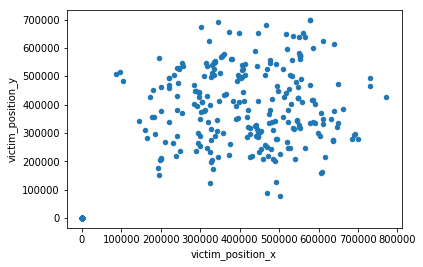

In [7]:
game0_bz = game0[game0['killed_by'] == 'Bluezone']
game0_bz.plot.scatter(x = 'victim_position_x', y = 'victim_position_y')

In [8]:
deaths[deaths["victim_position_x"]==0] #game where player left early

,Unnamed: 0,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,time,victim_name,victim_placement,victim_position_x,victim_position_y,new_id
20,20,Bluezone,NaN,NaN,NaN,NaN,ERANGEL,791,Young_Uzi,26.0,0.0,0.0,0
34,34,Bluezone,NaN,NaN,NaN,NaN,ERANGEL,828,LCQ-DALAO,32.0,0.0,0.0,0
60,60,Bluezone,NaN,NaN,NaN,NaN,ERANGEL,790,akm4a1asdfasf,39.0,0.0,0.0,0
76,76,Bluezone,NaN,NaN,NaN,NaN,ERANGEL,789,XiaoTian188288,42.0,0.0,0.0,0
150,150,Bluezone,NaN,NaN,NaN,NaN,ERANGEL,1343,qsl2010820,28.0,0.0,0.0,1
152,152,Bluezone,NaN,NaN,NaN,NaN,ERANGEL,1343,wish-from,28.0,0.0,0.0,1
201,201,Punch,fhnhjsagfjh,4.0,617747.7,504725.3,ERANGEL,134,spieN,50.0,0.0,0.0,2
223,223,Punch,fhnhjsagfjh,4.0,620343.2,506390.6,ERANGEL,119,lazychild,50.0,0.0,0.0,2
278,278,Bluezone,NaN,NaN,NaN,NaN,ERANGEL,1395,aixxyy,47.0,0.0,0.0,3
285,285,Bluezone,NaN,NaN,NaN,NaN,ERANGEL,841,XePLiN,94.0,0.0,0.0,3


In [9]:
game0 = deaths[deaths["new_id"] == 0]
x = game0['killer_position_x'].dropna()
y = game0['killer_position_x'].dropna()

/Users/franco/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


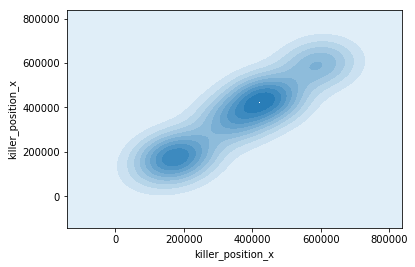

In [10]:
game0 = deaths[deaths['new_id'] == 0]
sns.kdeplot(x, y, shade=True)

/Users/franco/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


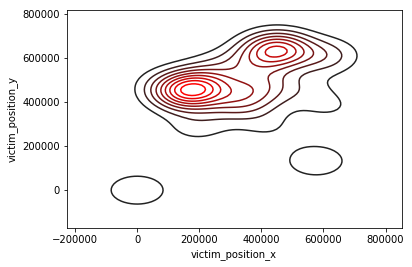

In [11]:
sns.kdeplot(game0.victim_position_x, game0.victim_position_y, color = 'r')

/Users/franco/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


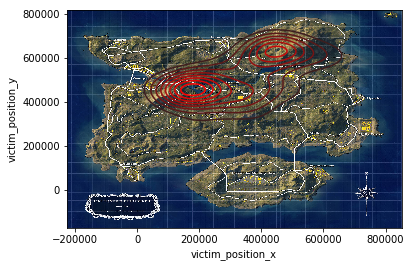

In [12]:
#Heatmap code
hmax = sns.kdeplot(game0.victim_position_x, game0.victim_position_y, color = 'r')
hmax.collections[0].set_alpha(0)

hmax.imshow(map_img,
          aspect = hmax.get_aspect(),
          extent = hmax.get_xlim() + hmax.get_ylim(),
          zorder = 1)
plt.show()

In [13]:
deaths.loc[[0]]['match_id'][0]

KeyError: 'match_id'

In [ ]:
deaths_bz[deaths_bz['new_id'] < 50].plot.scatter(x = 'victim_position_x', y = 'victim_position_y')